In [5]:
# Dependencies
import requests
import json
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from config import (api_key, gkey)
from pprint import pprint
from datetime import datetime


In [2]:
filename="Covid19_popu.csv"
covid_df=pd.read_csv(filename)
covid_df



LOC_id ISOALPHA                           COUNTRYNM NAME1  Confirmed  \
0         1      AFG                         Afghanistan   NaN         16   
1         2      ALB                             Albania   NaN         42   
2         3      DZA                             Algeria   NaN         48   
3         4      AND                             Andorra   NaN          1   
4         5      ATG                 Antigua and Barbuda   NaN          1   
..      ...      ...                                 ...   ...        ...   
251     252      VIR        United States Virgin Islands   NaN          1   
252     197      URY                             Uruguay   NaN          4   
253     254      UZB                          Uzbekistan   NaN          1   
254     255      VEN  Venezuela (Bolivarian Republic of)   NaN         10   
255     256      VNM                            Viet Nam   NaN         56   

     Deaths  Recovered  Latitude  Longitude population         land  \
0         0          0   33.9391    67.7100   36442712  640733.2562   
1         1          0   41.1533    20.1683    2935139  28195.68869   
2         4         12   28.0339     1.6596   43007779  2315206.619   
3         0          1   42.5063     1.5218      69654  452.0699393   
4         0          0   17.0608   -61.7964      96412  430.6744232   
..      ...        ...       ...        ...        ...          ...   
251       0          0   18.3358   -64.8963     107016  362.5222542   
252       0          0  -32.5228   -55.7658    3494819  174772.9719   
253       0          0   41.3775    64.5853   31767437  428650.2341   
254       0          0    6.4238   -66.5897   33116328  905593.4328   
255       0         16   14.0583   108.2772   98156607  326515.5615   

    risk_Permillion  
0              0.44  
1             14.31  
2              1.12  
3             14.36  
4             10.37  
..              ...  
251            9.34  
252            1.14  
253            0.03  
254             0.3  
255            0.57  

[256 rows x 12 columns]

In [3]:
covid_df["Latitude"]=pd.to_numeric(covid_df["Latitude"],errors='coerce')
covid_df["Longitude"]=pd.to_numeric(covid_df["Longitude"],errors='coerce')

In [4]:
# drop duplicated cities in coordinates_df dataframe 
#and define new columns in the dataframe for temp,cloudness, wind speed and humidity
covid_df.loc[0,"Max Temp (F)"]=""
covid_df.loc[0,"Humidity (%)"]=""
covid_df.loc[0,"Cloudiness (%)"]=""
covid_df.loc[0,"Wind Speed (m/s)"]=""

covid_df.head()


LOC_id ISOALPHA            COUNTRYNM NAME1  Confirmed  Deaths  Recovered  \
0       1      AFG          Afghanistan   NaN         16       0          0   
1       2      ALB              Albania   NaN         42       1          0   
2       3      DZA              Algeria   NaN         48       4         12   
3       4      AND              Andorra   NaN          1       0          1   
4       5      ATG  Antigua and Barbuda   NaN          1       0          0   

   Latitude  Longitude population         land risk_Permillion Max Temp (F)  \
0   33.9391    67.7100   36442712  640733.2562            0.44                
1   41.1533    20.1683    2935139  28195.68869           14.31          NaN   
2   28.0339     1.6596   43007779  2315206.619            1.12          NaN   
3   42.5063     1.5218      69654  452.0699393           14.36          NaN   
4   17.0608   -61.7964      96412  430.6744232           10.37          NaN   

  Humidity (%) Cloudiness (%) Wind Speed (m/s)  
0                                               
1          NaN            NaN              NaN  
2          NaN            NaN              NaN  
3          NaN            NaN              NaN  
4          NaN            NaN              NaN

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
#api.openweathermap.org/data/2.5/weather?lat=35&lon=139


In [ ]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
#api.openweathermap.org/data/2.5/weather?lat=35&lon=139
# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}"

# Loop through the list of cities and perform a request for data on each

with open("Temp_retrieve.log", 'w') as f:
    for j in range(0,len(covid_df.Latitude)):
        quary_url=f"{query_url}&lat={covid_df.iloc[j,7]}&lon={covid_df.iloc[j,8]}"
        response = requests.get(quary_url).json()
        pprint(response)
        try:
        
            covid_df.iloc[j,12]=response["main"]["temp_max"]
            covid_df.iloc[j,13]=response["main"]["humidity"]
            covid_df.iloc[j,14]=response["clouds"]["all"]
            covid_df.iloc[j,15]=response["wind"]["speed"]
            print(f"City ID: {response['id']} been processed.", file = f)
        
        
        except KeyError:
            print(f" City {covid_df.iloc[j,3]} {covid_df.iloc[j,2]} : weather data not found", file = f)
   

    
    
    

In [ ]:
check=covid_df[covid_df["Max Temp (F)"].isnull()]
check.head(30)
covid_df.head()
covid_df.to_csv("covid_df.csv")

In [17]:
#convert string datatype to numeric for the following columns
covid_df["Max Temp (F)"]=pd.to_numeric(covid_df["Max Temp (F)"],errors='coerce')
covid_df["Humidity (%)"]=pd.to_numeric(covid_df["Humidity (%)"],errors='coerce')
covid_df["Cloudiness (%)"]=pd.to_numeric(covid_df["Cloudiness (%)"],errors='coerce')
covid_df["Wind Speed (m/s)"]=pd.to_numeric(covid_df["Wind Speed (m/s)"],errors='coerce')
covid_df["risk_Permillion"]=pd.to_numeric(covid_df["risk_Permillion"],errors='coerce')
covid_df["population"]=pd.to_numeric(covid_df["population"],errors='coerce')
covid_df["land"]=pd.to_numeric(covid_df["land"],errors='coerce')
print(covid_df.dtypes)
covid_df.head() 

Unnamed: 0            int64
LOC_id                int64
ISOALPHA             object
COUNTRYNM            object
NAME1                object
Confirmed             int64
Deaths                int64
Recovered             int64
Latitude            float64
Longitude           float64
population          float64
land                float64
risk_Permillion     float64
Max Temp (F)        float64
Humidity (%)          int64
Cloudiness (%)        int64
Wind Speed (m/s)    float64
temp_gp              object
Wind Speed (mph)    float64
Log Case            float64
Trans Case          float64
density             float64
density_gp           object
dtype: object


Unnamed: 0  LOC_id ISOALPHA            COUNTRYNM NAME1  Confirmed  Deaths  \
0           0       1      AFG          Afghanistan   NaN         16       0   
1           1       2      ALB              Albania   NaN         42       1   
2           2       3      DZA              Algeria   NaN         48       4   
3           3       4      AND              Andorra   NaN          1       0   
4           4       5      ATG  Antigua and Barbuda   NaN          1       0   

   Recovered  Latitude  Longitude  ...  Max Temp (F)  Humidity (%)  \
0          0   33.9391    67.7100  ...         28.31            89   
1          0   41.1533    20.1683  ...         37.40            93   
2         12   28.0339     1.6596  ...         64.31            31   
3          1   42.5063     1.5218  ...         48.99            89   
4          0   17.0608   -61.7964  ...         77.00            73   

   Cloudiness (%)  Wind Speed (m/s)  temp_gp  Wind Speed (mph)  Log Case  \
0               0               NaN                   5.614719  4.008989   
1              39               NaN                   5.010746  5.395748   
2               0               NaN                  31.585593  5.587965   
3              45               NaN                  10.961006  0.137504   
4              40               NaN                  15.501994  0.137504   

  Trans Case       density  density_gp  
0  -0.888969  2.335006e+13   H Density  
1   3.848998  8.275827e+10   L Density  
2   0.286881  9.957189e+13   H Density  
3   3.853996  3.148848e+07   L Density  
4   3.388190  4.152218e+07   L Density  

[5 rows x 23 columns]

In [14]:
covid_df.describe()


Unnamed: 0      LOC_id     Confirmed       Deaths     Recovered  \
count  256.000000  256.000000    256.000000   256.000000    256.000000   
mean   127.500000  128.500000    654.093750    25.156250    297.007812   
std     74.045031   74.045031   4644.570432   227.984896   3408.079206   
min      0.000000    1.000000      0.000000     0.000000      0.000000   
25%     63.750000   64.750000      4.000000     0.000000      0.000000   
50%    127.500000  128.500000     27.000000     0.000000      0.000000   
75%    191.250000  192.250000    120.500000     1.000000      5.250000   
max    255.000000  256.000000  67794.000000  3085.000000  54288.000000   

         Latitude   Longitude    population          land  risk_Permillion  \
count  256.000000  256.000000  2.530000e+02  2.530000e+02       253.000000   
mean    27.485944    4.760327  2.823490e+07  4.270343e+05        44.265138   
std     22.842008   81.454055  9.435456e+07  1.241287e+06       228.773705   
min    -41.454500 -157.498300  8.040000e+02  5.287310e-01         0.000000   
25%     15.060375  -72.953825  1.826156e+06  2.819569e+04         1.520000   
50%     33.913000   10.225750  6.745354e+06  1.388882e+05         6.200000   
75%     42.898650   70.314000  2.752307e+07  3.535649e+05        16.060000   
max     64.963100  174.886000  1.388858e+09  1.627888e+07      3110.280000   

       Max Temp (F)  Humidity (%)  Cloudiness (%)  Wind Speed (m/s)  \
count    256.000000    256.000000      256.000000        256.000000   
mean      57.241016     70.378906       45.761719          8.015352   
std       20.254697     24.225594       37.774276          5.860046   
min      -14.800000      5.000000        0.000000          0.490000   
25%       42.800000     56.000000        6.250000          3.360000   
50%       59.000000     76.500000       40.000000          6.930000   
75%       73.547500     90.000000       90.000000         10.330000   
max      102.990000    100.000000      100.000000         33.330000   

       Wind Speed (mph)    Log Case  Trans Case       density  
count        256.000000  256.000000  253.000000  2.530000e+02  
mean          17.929861    4.787160    2.448865  4.705480e+13  
std           13.108572    3.323822    2.747842  3.310392e+14  
min            1.096101   -3.321928   -3.321928  4.250997e+02  
25%            7.516118    2.035624    0.695994  8.628249e+10  
50%           15.501994    4.760221    2.655352  8.714198e+11  
75%           23.107590    6.913757    4.014355  7.837975e+12  
max           74.557210   16.048872   11.602875  4.345832e+15

In [15]:
#define temperature group based on max temperature for each location
covid_df["temp_gp"]=""
for j in range(0,len(covid_df["Max Temp (F)"])):
    if covid_df.iloc[j,12]>-1000 and covid_df.iloc[j,12]<42.8:
        covid_df.iloc[j,16]="L Temp"
    elif covid_df.iloc[j,12]>=42.8 and covid_df.iloc[j,12]<73.5:
        covid_df.iloc[j,16]="M Temp"
    elif covid_df.iloc[j,12]>=73.5 and covid_df.iloc[j,12]<1000:
        covid_df.iloc[j,16]="H Temp"   
    


covid_df.head()  

Unnamed: 0  LOC_id ISOALPHA            COUNTRYNM NAME1  Confirmed  Deaths  \
0           0       1      AFG          Afghanistan   NaN         16       0   
1           1       2      ALB              Albania   NaN         42       1   
2           2       3      DZA              Algeria   NaN         48       4   
3           3       4      AND              Andorra   NaN          1       0   
4           4       5      ATG  Antigua and Barbuda   NaN          1       0   

   Recovered  Latitude  Longitude  ...  Max Temp (F)  Humidity (%)  \
0          0   33.9391    67.7100  ...         28.31            89   
1          0   41.1533    20.1683  ...         37.40            93   
2         12   28.0339     1.6596  ...         64.31            31   
3          1   42.5063     1.5218  ...         48.99            89   
4          0   17.0608   -61.7964  ...         77.00            73   

   Cloudiness (%)  Wind Speed (m/s)  temp_gp  Wind Speed (mph)  Log Case  \
0               0            L Temp                   5.614719  4.008989   
1              39            L Temp                   5.010746  5.395748   
2               0            L Temp                  31.585593  5.587965   
3              45            L Temp                  10.961006  0.137504   
4              40            L Temp                  15.501994  0.137504   

  Trans Case       density  density_gp  
0  -0.888969  2.335006e+13   H Density  
1   3.848998  8.275827e+10   L Density  
2   0.286881  9.957189e+13   H Density  
3   3.853996  3.148848e+07   L Density  
4   3.388190  4.152218e+07   L Density  

[5 rows x 23 columns]

In [ ]:
# convert wind speed unit m/s to MPH
covid_df["Wind Speed (mph)"]=covid_df["Wind Speed (m/s)"]*2.23694
covid_df["Log Case"]=np.log2(covid_df["Confirmed"]+0.1)
covid_df["Trans Case"]=np.log2(covid_df["risk_Permillion"]+0.1)
covid_df["density"]=covid_df["population"]*covid_df["land"]


In [120]:
#define population density group based on the population density  for each location
covid_df["density_gp"]=""
for j in range(0,len(covid_df["density"])):
    if covid_df.iloc[j,20]>-1000 and covid_df.iloc[j,20]<8.628249e+10:
        covid_df.iloc[j,21]="L Density"
    elif covid_df.iloc[j,20]>=8.628249e+10 and covid_df.iloc[j,20]<7.837975e+12:
        covid_df.iloc[j,21]="M Density"
    elif covid_df.iloc[j,20]>=7.837975e+12 and covid_df.iloc[j,20]<=4.345832e+15:
        covid_df.iloc[j,21]="H Density"   
    


covid_df.head()  

LOC_id ISOALPHA            COUNTRYNM NAME1  Confirmed  Deaths  Recovered  \
0       1      AFG          Afghanistan   NaN         16       0          0   
1       2      ALB              Albania   NaN         42       1          0   
2       3      DZA              Algeria   NaN         48       4         12   
3       4      AND              Andorra   NaN          1       0          1   
4       5      ATG  Antigua and Barbuda   NaN          1       0          0   

   Latitude  Longitude  population  ...  Max Temp (F)  Humidity (%)  \
0   33.9391    67.7100  36442712.0  ...         28.31            89   
1   41.1533    20.1683   2935139.0  ...         37.40            93   
2   28.0339     1.6596  43007779.0  ...         64.31            31   
3   42.5063     1.5218     69654.0  ...         48.99            89   
4   17.0608   -61.7964     96412.0  ...         77.00            73   

   Cloudiness (%)  Wind Speed (m/s)  temp_gp  Wind Speed (mph)  Log Case  \
0               0              2.51   L Temp          5.614719  4.008989   
1              39              2.24   L Temp          5.010746  5.395748   
2               0             14.12   M Temp         31.585593  5.587965   
3              45              4.90   M Temp         10.961006  0.137504   
4              40              6.93   H Temp         15.501994  0.137504   

   Trans Case       density  density_gp  
0   -0.888969  2.335006e+13   H Density  
1    3.848998  8.275827e+10   L Density  
2    0.286881  9.957189e+13   H Density  
3    3.853996  3.148848e+07   L Density  
4    3.388190  4.152218e+07   L Density  

[5 rows x 22 columns]

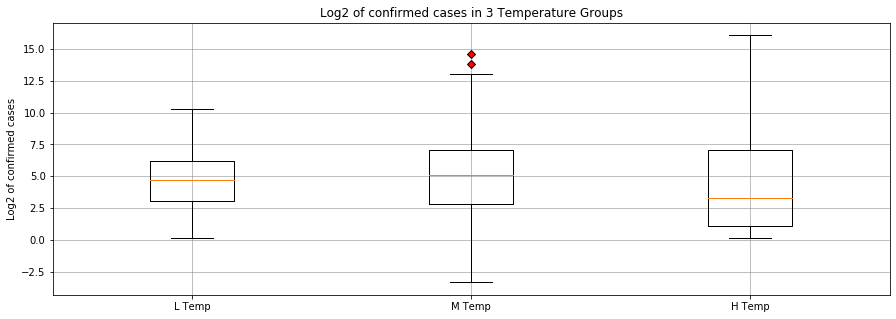

In [248]:
# box plot of log2 of confirmed cases versus weather temperature groups
Temp3_gp=[]

for x in ['L Temp','M Temp','H Temp']:
     Temp3_gp.append(covid_df.loc[covid_df["temp_gp"]==x]["Log Case"])

red_diamond = dict(markerfacecolor='r', marker='D')
fig1, ax1 = plt.subplots(figsize=(15,5))
ax1.set_title('Log2 of confirmed cases in 3 Temperature Groups')
ax1.set_ylabel('Log2 of confirmed cases')
ax1.set_xticklabels(['L Temp','M Temp','H Temp'])
ax1.grid(which='major', linestyle='-', linewidth='0.5', color='grey')
ax1.boxplot(Temp3_gp,flierprops=red_diamond)
plt.show()

fig1.savefig(f"Cases_3Temp")


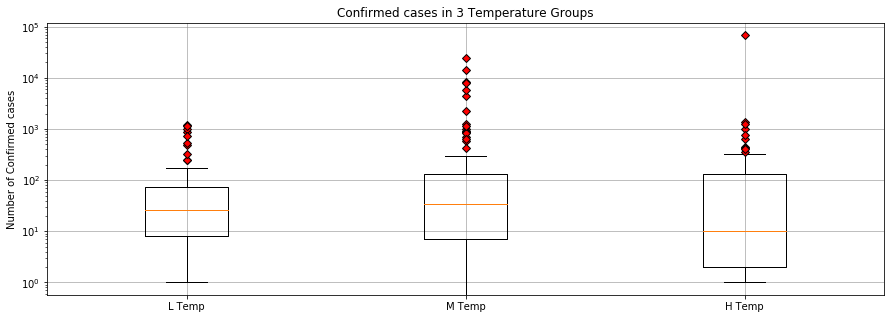

In [249]:
# box plot of total number of confirmed cases versus weather temperature groups

Temp4_gp=[]
for x in ['L Temp','M Temp','H Temp']:
     Temp4_gp.append(covid_df.loc[covid_df["temp_gp"]==x]["Confirmed"])

red_diamond = dict(markerfacecolor='r', marker='D')
fig1, ax1 = plt.subplots(figsize=(15,5))
ax1.set_title('Confirmed cases in 3 Temperature Groups')
ax1.set_ylabel('Number of Confirmed cases')
ax1.set_xticklabels(['L Temp','M Temp','H Temp'])
ax1.grid(which='major', linestyle='-', linewidth='0.5', color='grey')
plt.yscale('log')
ax1.boxplot(Temp4_gp,flierprops=red_diamond)
plt.show()

fig1.savefig(f"Cases_3Temp_a")

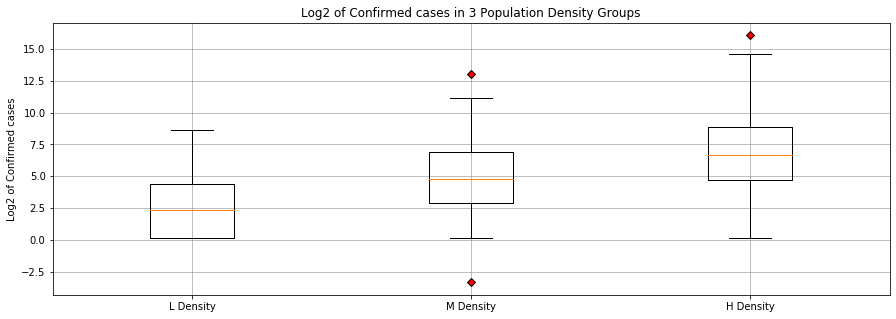

In [250]:
# # box plot of log2 of confirmed cases versus population density groups
den3_gp=[]

for x in ['L Density','M Density','H Density']:
     den3_gp.append(covid_df.loc[covid_df["density_gp"]==x]["Log Case"])

red_diamond = dict(markerfacecolor='r', marker='D')
fig1, ax1 = plt.subplots(figsize=(15,5))
ax1.set_title('Log2 of Confirmed cases in 3 Population Density Groups')
ax1.set_ylabel('Log2 of Confirmed cases')
ax1.set_xticklabels(['L Density','M Density','H Density'])
ax1.grid(which='major', linestyle='-', linewidth='0.5', color='grey')
ax1.boxplot(den3_gp,flierprops=red_diamond)
plt.show()

fig1.savefig(f"LogCases_3Dents")



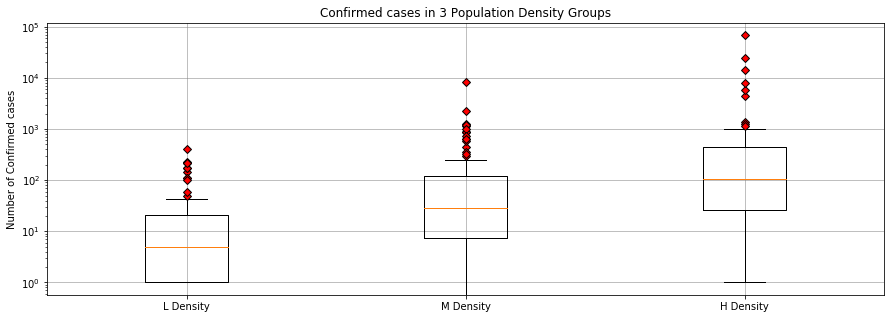

In [251]:
#  box plot of total number of confirmed cases versus population density groups
den4_gp=[]

for x in ['L Density','M Density','H Density']:
     den4_gp.append(covid_df.loc[covid_df["density_gp"]==x]["Confirmed"])

red_diamond = dict(markerfacecolor='r', marker='D')
fig1, ax1 = plt.subplots(figsize=(15,5))
ax1.set_title('Confirmed cases in 3 Population Density Groups')
ax1.set_ylabel('Number of Confirmed cases')
ax1.set_xticklabels(['L Density','M Density','H Density'])
plt.yscale('log')
ax1.grid(which='major', linestyle='-', linewidth='0.5', color='grey')
ax1.boxplot(den4_gp,flierprops=red_diamond)
plt.show()

fig1.savefig(f"Cases_3Dents")


In [8]:
# one way Anova were applied if data were normal distributed, otherwise Kruskal wallis tests were applied. 
gp1=covid_df[covid_df["temp_gp"]=="L Temp"]["Log Case"]
gp2=covid_df[covid_df["temp_gp"]=="M Temp"]["Log Case"]
gp3=covid_df[covid_df["temp_gp"]=="H Temp"]["Log Case"]


In [9]:
st.f_oneway(gp1,gp2,gp3)

F_onewayResult(statistic=1.9301792953277608, pvalue=0.1472531986687609)

In [10]:
st.kruskal(gp1,gp2,gp3)

KruskalResult(statistic=3.621794297157591, pvalue=0.16350738056737488)

In [11]:
gp1=covid_df[covid_df["density_gp"]=="L Density"]["Log Case"]
gp2=covid_df[covid_df["density_gp"]=="M Density"]["Log Case"]
gp3=covid_df[covid_df["density_gp"]=="H Density"]["Log Case"]
st.f_oneway(gp1,gp2,gp3)

F_onewayResult(statistic=23.694997671391697, pvalue=3.773173902189276e-10)

In [ ]:
# scatter plot of log2 confirmed cases versus log2 population density

y_values = covid_df["Log Case"]
x_values = np.log2(covid_df["density"]+0.1)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10, 5))
plt.scatter(x_values,y_values,marker="o", facecolors="green", edgecolors="green",
    s=x_values, alpha=0.75)
plt.plot(x_values,regress_values,"r-")
plt.annotate(""+line_eq,(10,36),fontsize=15,color="red")
plt.ylabel("Log2 of confirmed cases")
plt.xlabel('Log2 of density')
#     plt.ylim(min(y_values)-2, max(y_values)+2)
#     plt.xlim(14, max(x_values)+1)
plt.title(" Log2 of confirmed cases versus Log2 density ")
    
print(f" The R-squared : {round(rvalue,2)}") 
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
fig1.savefig(f"log2Cases_logDents_scatter")


 The R-squared : 0.22
 The R-squared : 0.09
 The R-squared : -0.09
 The R-squared : -0.05
 The R-squared : 0.0


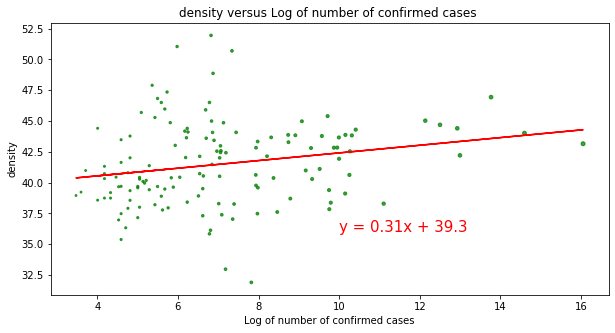

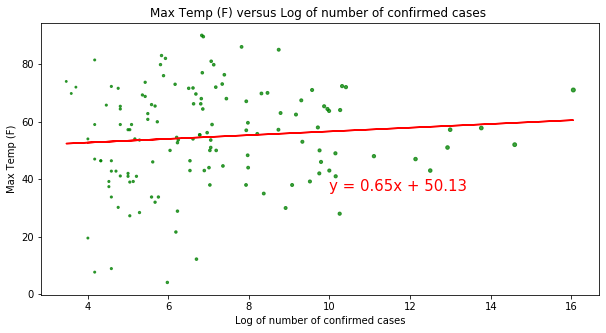

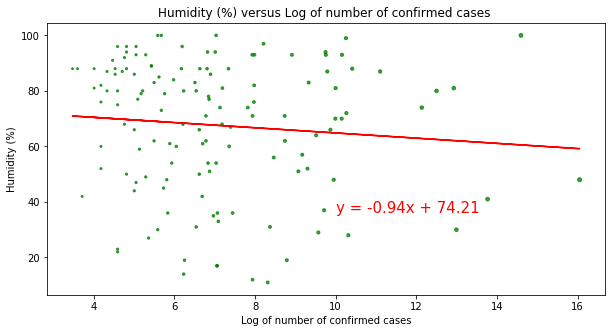

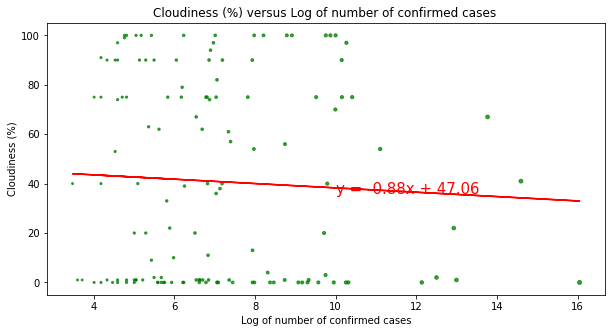

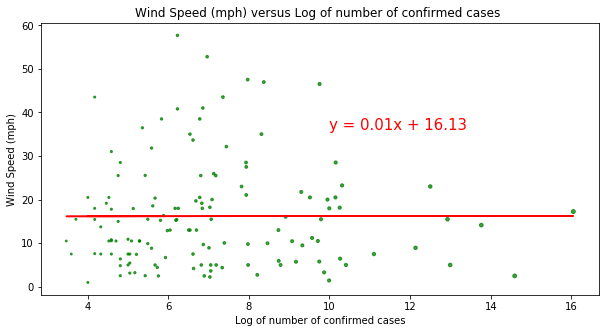

In [100]:
#scatter plots with regressionline of weather conditions versus log2 of confirmed cases
ce_df=define_df

#set up a list of vars to loop over Temperature (F)","Humidity (%)","Cloudiness (%)","Wind Speed (mph)" with the same scatter plots
var_list=["density","Max Temp (F)","Humidity (%)","Cloudiness (%)","Wind Speed (mph)"]

for var in var_list:
    
# Calculate linear regression model and Add the linear regression equation and line to plot
    x_values = ce_df["Log Case"]
    y_values = ce_df[var]
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.figure(figsize=(10, 5))
    plt.scatter(x_values,y_values,marker="o", facecolors="green", edgecolors="green",
          s=x_values, alpha=0.75)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(""+line_eq,(10,36),fontsize=15,color="red")
    plt.ylabel(var)
    plt.xlabel('Log of number of confirmed cases')
#     plt.ylim(min(y_values)-2, max(y_values)+2)
#     plt.xlim(14, max(x_values)+1)
    plt.title(f"{var} versus Log of number of confirmed cases ")
    
    print(f" The R-squared : {round(rvalue,2)}")  
    
    
    

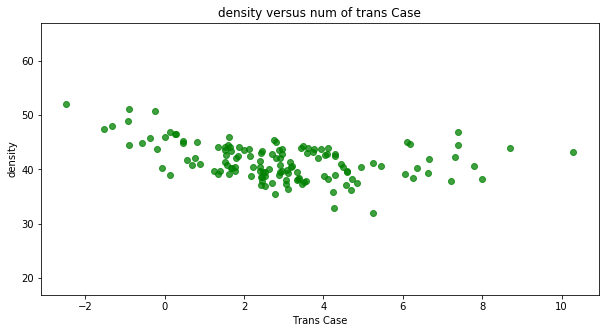

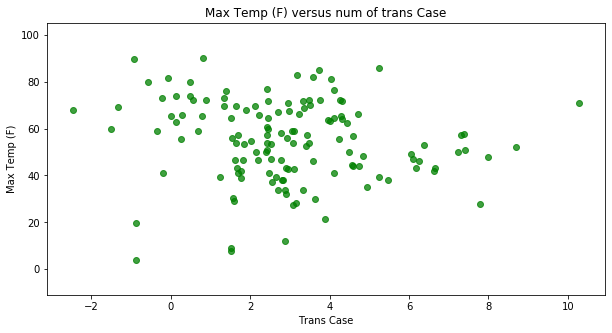

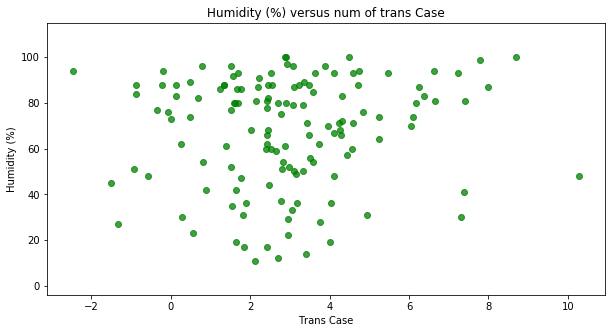

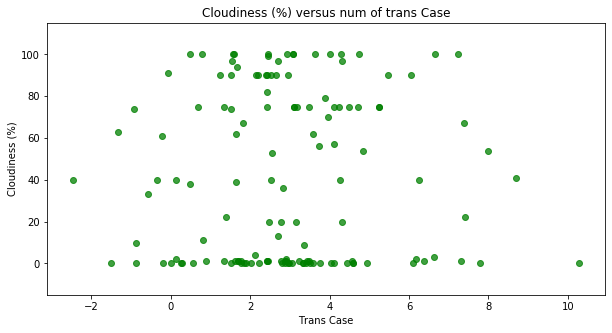

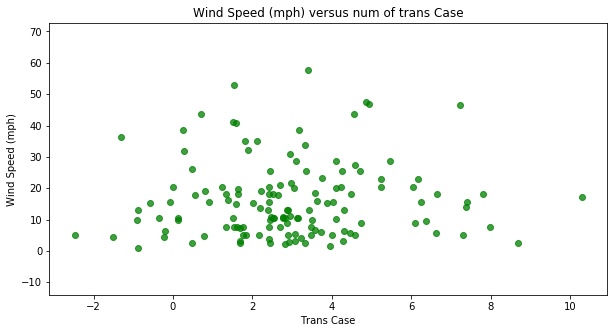

In [101]:
##scatter plots of weather conditions versus log2 of number of confirmed cases per million

#set up a list of vars to loop over Temperature (F)","Humidity (%)","Cloudiness (%)","Wind Speed (mph)" with the same scatter plots
var_list=["density","Max Temp (F)","Humidity (%)","Cloudiness (%)","Wind Speed (mph)"]

for var in var_list:
    
    fig1 =plt.figure(figsize=(10, 5))
    plt.scatter(ce_df["Trans Case"],ce_df[var], marker="o", facecolors="green", edgecolors="green", alpha=0.75)
    plt.ylabel(var)
    plt.xlabel('Trans Case')
    plt.ylim(min(ce_df[var])-15, max(ce_df[var])+15)
    #plt.xlim(min(ce_df["Max Temp (F)])-10, max(ce_df["Max Temp (F)"])+10)
    plt.title(f"{var} versus num of trans Case")
    
    fig1.savefig(f"{var}")
    

In [141]:
#######################
##  time series data
#########################
filename2="Long_format_Timepoints.csv"
timept_df=pd.read_csv(filename2)
timept_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3988 entries, 0 to 3987
Data columns (total 12 columns):
LOC_id         3988 non-null int64
Date           3988 non-null object
Confirmed      3988 non-null int64
ISOALPHA       3988 non-null object
COUNTRYNM      3988 non-null object
NAME1          2134 non-null object
population     3988 non-null int64
land           3988 non-null float64
lag_confirm    3988 non-null object
time_point     3988 non-null int64
new_cases      3988 non-null object
log_conf       3988 non-null float64
dtypes: float64(2), int64(4), object(6)
memory usage: 374.0+ KB


In [140]:
loc_list=timept_df["LOC_id"].unique().tolist()

In [194]:
# calculate COVID-19 transmission rate for each locationby applying linear regression
#model to daily time series of confirmed case in each location
x_gp=[[]]
y_gp=[[]]
slope_list=[]
for x in loc_list:
    x_gp=timept_df.loc[timept_df["LOC_id"]==x]["time_point"]
    y_gp=timept_df.loc[timept_df["LOC_id"]==x]["log_conf"]
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_gp, y_gp)
    slope_list.append(slope)



In [239]:
t1=covid_df[["LOC_id","density","Max Temp (F)","Cloudiness (%)","Wind Speed (mph)","Humidity (%)","density_gp","temp_gp"]]

t1.drop_duplicates()

LOC_id       density  Max Temp (F)  Cloudiness (%)  Wind Speed (mph)  \
0         1  2.335006e+13         28.31               0          5.614719   
1         2  8.275827e+10         37.40              39          5.010746   
2         3  9.957189e+13         64.31               0         31.585593   
3         4  3.148848e+07         48.99              45         10.961006   
4         5  4.152218e+07         77.00              40         15.501994   
..      ...           ...           ...             ...               ...   
251     252  3.879568e+07         77.00               1         10.513618   
252     197  6.107999e+11         65.93             100         41.584715   
253     254  1.361712e+13         57.11              12         23.376023   
254     255  2.998993e+13         70.97              11          3.847537   
255     256  3.204966e+13         86.63              34         20.915389   

     Humidity (%) density_gp temp_gp  
0              89  H Density  L Temp  
1              93  L Density  L Temp  
2              31  H Density  M Temp  
3              89  L Density  M Temp  
4              73  L Density  H Temp  
..            ...        ...     ...  
251            83  L Density  H Temp  
252            96  M Density  M Temp  
253            43  H Density  M Temp  
254            73  H Density  M Temp  
255            37  H Density  H Temp  

[256 rows x 8 columns]

In [240]:
#build a COVID19 slope dataframe and merge with weather temperature and population density
slope_dict={"LOC_id": loc_list,"Slope":slope_list}
slope_df=pd.DataFrame(slope_dict)

new_df=pd.merge(slope_df,t1 ,on='LOC_id')
new_df




LOC_id     Slope       density  Max Temp (F)  Cloudiness (%)  \
0         1  0.215378  2.335006e+13         28.31               0   
1         3  0.325050  9.957189e+13         64.31               0   
2         6  0.479351  1.250451e+14         61.43               0   
3         7  0.343353  8.628249e+10         41.00              90   
4        10  0.092174  8.929587e+12         82.00               1   
..      ...       ...           ...           ...             ...   
135     245  0.725036  1.499303e+10         39.20              90   
136     247  0.512000  9.964306e+07         87.80              20   
137     248  0.259875  3.275726e+10         77.00              40   
138     250  0.660489  1.084822e+12         17.87             100   
139     256  0.077239  3.204966e+13         86.63              34   

     Wind Speed (mph)  Humidity (%) density_gp temp_gp  
0            5.614719            89  H Density  L Temp  
1           31.585593            31  H Density  M Temp  
2           13.869028            88  H Density  M Temp  
3            7.516118            86  M Density  L Temp  
4           38.520107            57  H Density  H Temp  
..                ...           ...        ...     ...  
135         28.520985            55  L Density  L Temp  
136         51.539098            58  L Density  H Temp  
137         23.018113            83  L Density  H Temp  
138         12.370278            97  M Density  L Temp  
139         20.915389            37  H Density  H Temp  

[140 rows x 9 columns]

/Users/jadetao/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  # Remove the CWD from sys.path while we load stuff.


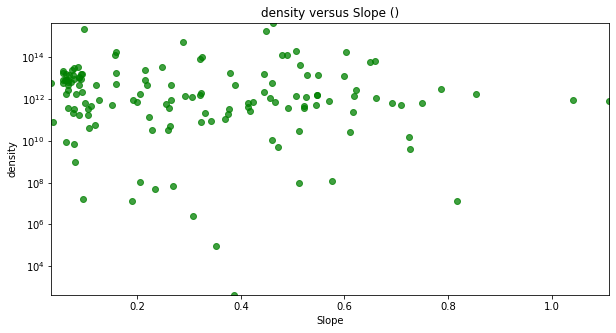

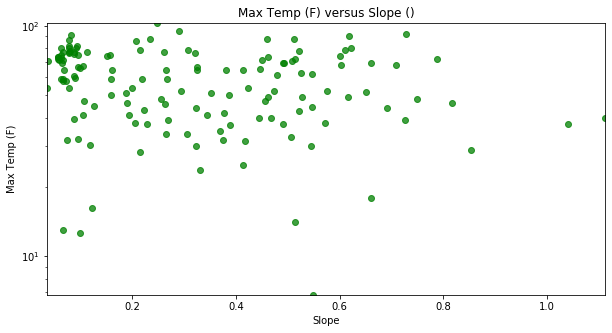

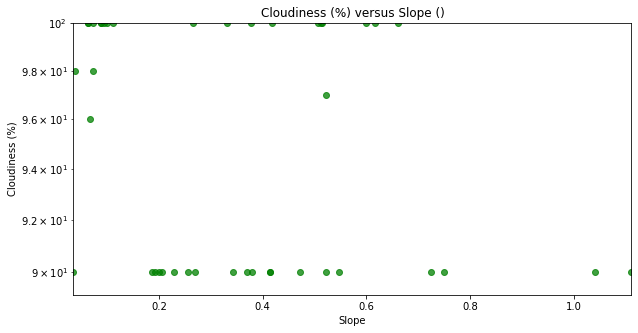

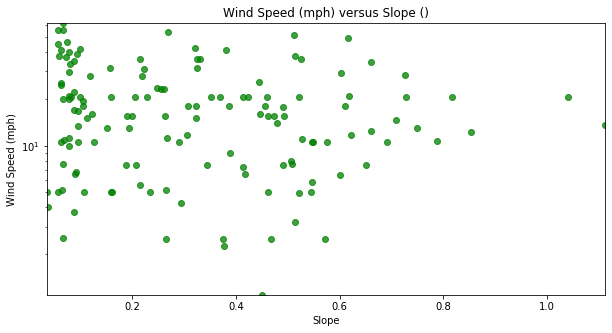

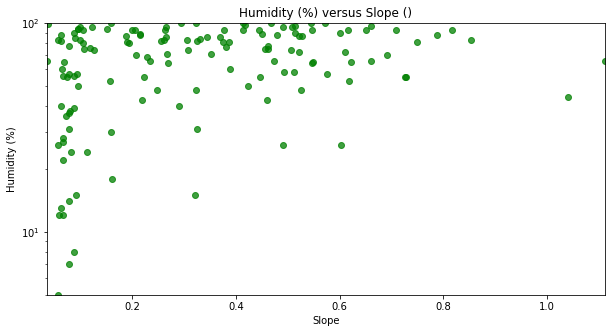

In [224]:
# scatter plots of COVID transmission rate veraua weather conditions and population density
#set up a list of vars to loop over Temperature (F)","Humidity (%)","Cloudiness (%)","Wind Speed (mph)" with the same scatter plots
var_list=["density","Max Temp (F)","Cloudiness (%)","Wind Speed (mph)","Humidity (%)"]
for var in var_list:
    
    fig1 =plt.figure(figsize=(10, 5))
    plt.scatter(new_df["Slope"],new_df[var], marker="o", facecolors="green", edgecolors="green", alpha=0.75)
    plt.ylabel(var)
    plt.xlabel("Slope")
    plt.yscale('log')
    plt.ylim(min(new_df[var]), max(new_df[var]))
    plt.xlim(min(new_df["Slope"]), max(new_df["Slope"]))
    plt.title(f"{var} versus Slope ()")
    
    fig1.savefig(f"{var}")
    

In [241]:

new_df

LOC_id     Slope       density  Max Temp (F)  Cloudiness (%)  \
0         1  0.215378  2.335006e+13         28.31               0   
1         3  0.325050  9.957189e+13         64.31               0   
2         6  0.479351  1.250451e+14         61.43               0   
3         7  0.343353  8.628249e+10         41.00              90   
4        10  0.092174  8.929587e+12         82.00               1   
..      ...       ...           ...           ...             ...   
135     245  0.725036  1.499303e+10         39.20              90   
136     247  0.512000  9.964306e+07         87.80              20   
137     248  0.259875  3.275726e+10         77.00              40   
138     250  0.660489  1.084822e+12         17.87             100   
139     256  0.077239  3.204966e+13         86.63              34   

     Wind Speed (mph)  Humidity (%) density_gp temp_gp  
0            5.614719            89  H Density  L Temp  
1           31.585593            31  H Density  M Temp  
2           13.869028            88  H Density  M Temp  
3            7.516118            86  M Density  L Temp  
4           38.520107            57  H Density  H Temp  
..                ...           ...        ...     ...  
135         28.520985            55  L Density  L Temp  
136         51.539098            58  L Density  H Temp  
137         23.018113            83  L Density  H Temp  
138         12.370278            97  M Density  L Temp  
139         20.915389            37  H Density  H Temp  

[140 rows x 9 columns]

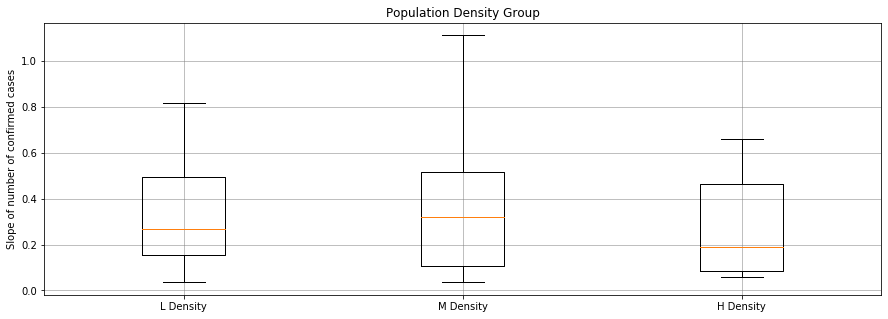

In [253]:
#boxplot of transmission rate versus population density groups

dent_gp=[]

for x in ['L Density','M Density','H Density']:
     dent_gp.append(new_df.loc[new_df["density_gp"]==x]["Slope"])

red_diamond = dict(markerfacecolor='r', marker='D')
fig1, ax1 = plt.subplots(figsize=(15,5))
ax1.set_title('Population Density Group')
ax1.set_ylabel('Slope of number of confirmed cases')
ax1.set_xticklabels(['L Density','M Density','H Density'])
#plt.yscale('log')
ax1.grid(which='major', linestyle='-', linewidth='0.5', color='grey')
ax1.boxplot(dent_gp,flierprops=red_diamond)
plt.show()
fig1.savefig(f"slope_3Dents")


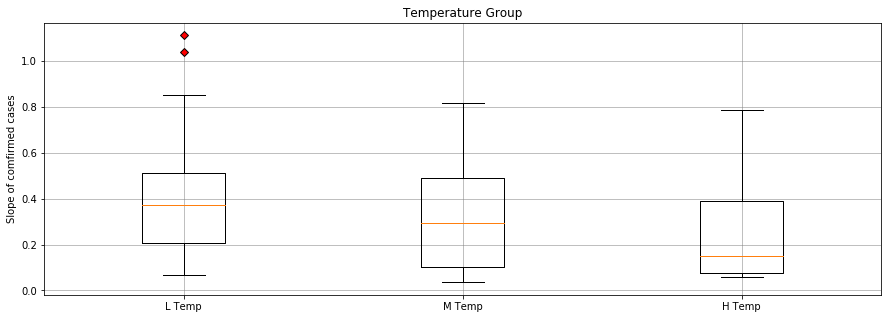

In [255]:
#boxplot of transmission rate versus weather temperature groups
Te_gp=[]

for x in ['L Temp','M Temp','H Temp']:
     Te_gp.append(new_df.loc[new_df["temp_gp"]==x]["Slope"])

red_diamond = dict(markerfacecolor='r', marker='D')
fig1, ax1 = plt.subplots(figsize=(15,5))
ax1.set_title('Temperature Group')
ax1.set_ylabel('Slope of comfirmed cases')
ax1.set_xticklabels(['L Temp','M Temp','H Temp'])
ax1.grid(which='major', linestyle='-', linewidth='0.5', color='grey')
ax1.boxplot(Te_gp,flierprops=red_diamond)
plt.show()

fig1.savefig(f"slope_3temps")


In [237]:
# one way Anova were applied if data were normal distributed, otherwise Kruskal wallis tests were applied. 


gp1=new_df[new_df["density_gp"]=="L Density"]["Slope"]
gp2=new_df[new_df["density_gp"]=="M Density"]["Slope"]
gp3=new_df[new_df["density_gp"]=="H Density"]["Slope"]
#######one way anova test
st.f_oneway(gp1,gp2,gp3)


KruskalResult(statistic=2.472980847818178, pvalue=0.2904016181488553)

In [238]:
#####non-parametric test
st.kruskal(gp1,gp2,gp3)

KruskalResult(statistic=2.472980847818178, pvalue=0.2904016181488553)

In [245]:
# one way Anova were applied if data were normal distributed, otherwise Kruskal wallis tests were applied. 
gp1=new_df[new_df["temp_gp"]=="L Temp"]["Slope"]
gp2=new_df[new_df["temp_gp"]=="M Temp"]["Slope"]
gp3=new_df[new_df["temp_gp"]=="H Temp"]["Slope"]
#######one way anova test
st.f_oneway(gp1,gp2,gp3)



F_onewayResult(statistic=3.4888665064247744, pvalue=0.033275812388761976)

In [246]:
st.kruskal(gp1,gp2,gp3)

KruskalResult(statistic=7.584335849365516, pvalue=0.022546669348302184)

In [7]:
#for cindy's soci0-economic status
obs=np.array([[58,100],[43,153]])
g,p,dof,expected=st.chi2_contingency(obs,lambda_="log-likelihood")

In [12]:
obs=np.array([[58,100],[43,153]])
st.chi2_contingency(obs)

(8.648905262354663,
 0.0032725792858122353,
 1,
 array([[ 45.07909605, 112.92090395],
        [ 55.92090395, 140.07909605]]))

In [9]:
g,p

(8.624187579184454, 0.003317283561191168)